In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import sys

import seaborn as sns
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#shap.initjs()

#Statistical analysis and Data Cleaning

In [ ]:
df = pd.read_csv('/content/performance.csv', delimiter = ",")

In [ ]:
df.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
unique_values = df['Class'].unique()
print(unique_values)

['M' 'L' 'H']


#Preprocessing of features

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df.head(3)

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L

In [ ]:
df['gender'] = df['gender'].astype('category')
df['NationalITy'] = df['NationalITy'].astype('category')
df['PlaceofBirth'] = df['PlaceofBirth'].astype('category')
df['StageID'] = df['StageID'].astype('category')
df['GradeID'] = df['GradeID'].astype('category')
df['SectionID'] = df['SectionID'].astype('category')
df['Topic'] = df['Topic'].astype('category')
df['Semester'] = df['Semester'].astype('category')
df['Relation'] = df['Relation'].astype('category')
df['raisedhands'] = df['raisedhands'].astype('category')
df['Discussion'] = df['Discussion'].astype('category')
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].astype('category')
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].astype('category')
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].astype('category')
df['Class'] = df['Class'].astype('category')


In [ ]:
df_new = df.drop(columns=['Class'])

In [ ]:
cat_cols = df_new .select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols


In [ ]:
df_new [cat_cols] = df_new [cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns


In [ ]:
custom_mapping = {'L': 0, 'M': 1, 'H': 2}

# Map categories to specified codes
df['Category_Codes'] = df['Class'].map(custom_mapping)

print(df)

    gender  NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M           KW       KuwaIT    lowerlevel    G-04         A   
1        M           KW       KuwaIT    lowerlevel    G-04         A   
2        M           KW       KuwaIT    lowerlevel    G-04         A   
3        M           KW       KuwaIT    lowerlevel    G-04         A   
4        M           KW       KuwaIT    lowerlevel    G-04         A   
5        F           KW       KuwaIT    lowerlevel    G-04         A   
6        M           KW       KuwaIT  MiddleSchool    G-07         A   
7        M           KW       KuwaIT  MiddleSchool    G-07         A   
8        F           KW       KuwaIT  MiddleSchool    G-07         A   
9        F           KW       KuwaIT  MiddleSchool    G-07         B   
10       M           KW       KuwaIT  MiddleSchool    G-07         A   
11       M           KW       KuwaIT  MiddleSchool    G-07         B   
12       M           KW       KuwaIT    lowerlevel    G-04      

<Axes: xlabel='Class', ylabel='count'>

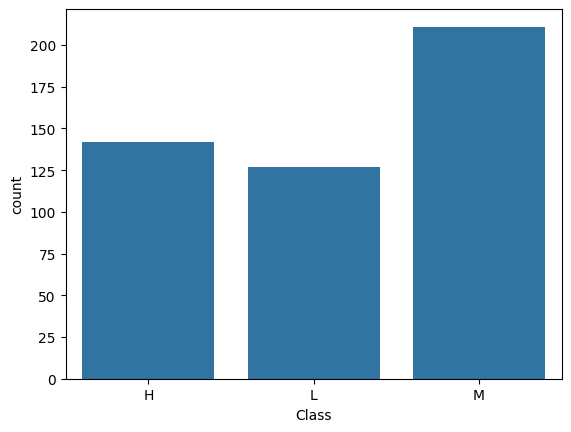

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="Class")

In [ ]:
x = df_new
y = df['Category_Codes']

In [ ]:
print(x.shape)
print(y.shape)

(480, 16)
(480,)


In [ ]:
x.head(1)

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          18                      1                         1   

   StudentAbsenceDays  
0                   1

#Data Mining Algorithm

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x_train, y_train)

In [ ]:
print(y_res.shape)

(489,)


In [ ]:
from collections import Counter
count = Counter(y_res)
print(count)

Counter({1: 163, 0: 163, 2: 163})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:
K = []
training = []
test = []
scores = {}
for k in range(2, 21):

    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_res, y_res)

    training_score = clf.score(x_res, y_res)
    test_score = clf.score(x_test, y_test)


    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)
test.sort()

# printing the last element
print("Largest element is:", test[-1])

2 : [0.8404907975460123, 0.5625]
3 : [0.8486707566462167, 0.6354166666666666]
4 : [0.8139059304703476, 0.6041666666666666]
5 : [0.8057259713701431, 0.6666666666666666]
6 : [0.787321063394683, 0.6041666666666666]
7 : [0.7791411042944786, 0.6041666666666666]
8 : [0.7484662576687117, 0.5729166666666666]
9 : [0.7443762781186094, 0.6354166666666666]
10 : [0.7321063394683026, 0.6041666666666666]
11 : [0.721881390593047, 0.6041666666666666]
12 : [0.7055214723926381, 0.6145833333333334]
13 : [0.7300613496932515, 0.6041666666666666]
14 : [0.7259713701431493, 0.6458333333333334]
15 : [0.7341513292433538, 0.6145833333333334]
16 : [0.7239263803680982, 0.65625]
17 : [0.7239263803680982, 0.6458333333333334]
18 : [0.7198364008179959, 0.6458333333333334]
19 : [0.7259713701431493, 0.65625]
20 : [0.7116564417177914, 0.6458333333333334]
Largest element is: 0.6666666666666666


In [ ]:
import sklearn
from sklearn import metrics

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}
precision = []

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_res, y_res)

y_pred = clf.predict(x_test)
import sklearn
from sklearn import metrics

test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average = 'macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average = 'macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.6666666666666666
0.6724713580782402
0.6644876181166504
0.7132381507381508


In [ ]:
import sklearn

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
max_depth = [1, 10, 20, 50, 100, 150, 200]
 #A = range(1,6)
test_score = []
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
f1 = []
p = []
r = []
for i in max_depth:

        clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=15, min_samples_leaf=2, max_features=11)

# Train Decision Tree Classifer
        clf = clf.fit(x_res, y_res)

#Predict the response for test dataset
        y_pred = clf.predict(x_test)
        test_score.append(metrics.accuracy_score(y_test, y_pred))
        f1.append(sklearn.metrics.f1_score(y_test, y_pred, average = 'macro'))
        p.append(sklearn.metrics.precision_score(y_test, y_pred, average = 'macro'))
        r.append(sklearn.metrics.recall_score(y_test, y_pred, average = 'macro'))





print(test_score)
print(f1)
print(p)
print(r)

[0.4895833333333333, 0.7708333333333334, 0.7083333333333334, 0.7083333333333334, 0.8125, 0.71875, 0.75]
[0.4351851851851852, 0.7718365061590146, 0.6929951690821256, 0.7090622537431047, 0.808427375589158, 0.7206864564007421, 0.7427063354000326]
[0.3278260869565217, 0.759731182795699, 0.6912259853436323, 0.6989053092501368, 0.8035426731078905, 0.7095891868880374, 0.7383252818035427]
[0.6538461538461539, 0.7944347319347319, 0.7094017094017094, 0.7246017871017871, 0.814005439005439, 0.7420843045843046, 0.7477175602175602]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score


model = RandomForestClassifier(n_estimators=210, max_depth=180, max_features=11)



model.fit(x_res, y_res)
y_pred = clf.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))

print(test_score)
print(f1)
print(p)
print(r)

0.7083333333333334
0.7104233136677301
0.7003319846457101
0.7504370629370629


In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression(fit_intercept = True, penalty = 'l1', solver='liblinear', class_weight='balanced')
learner.fit(x_res, y_res)
tr_pred = learner.predict(x_res)
predictions = learner.predict(x_test)


y_pred = learner.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.6875
0.691200821647907
0.6916335978835978
0.7506313131313131


In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)
learner.fit(x_res, y_res)
tr_pred = learner.predict(x_train)
predictions = learner.predict(x_test)


y_pred = learner.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.6770833333333334
0.6735642525116209
0.6717664081216347
0.6756021756021756


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

xgc.fit(x_res, y_res)
y_pred = xgc.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.84375
0.8426739926739927
0.8332209864060217
0.8571289821289821


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(x_res, y_res)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.7604166666666666
0.7651816793128491
0.7537998400067366
0.7921522921522922


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_classifier.fit(x_res, y_res)

# Make predictions on the testing data
predictions = adaboost_classifier.predict(x_test)

test_score = (metrics.accuracy_score(y_test, predictions))
f1 = (sklearn.metrics.f1_score(y_test, predictions, average='macro'))
p = (sklearn.metrics.precision_score(y_test, predictions, average='macro'))
r = (sklearn.metrics.recall_score(y_test, predictions, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.7916666666666666
0.7966944566330262
0.7900710557756397
0.8247377622377622


In [ ]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

xgc.fit(x_train, y_train)
y_pred = xgc.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred, average='macro'))
p = (sklearn.metrics.precision_score(y_test, y_pred, average='macro'))
r = (sklearn.metrics.recall_score(y_test, y_pred, average='macro'))
print(test_score)
print(f1)
print(p)
print(r)

0.8645833333333334
0.8634271663153884
0.8597883597883599
0.871017871017871


#Explainable AI LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=224cdcfa55cddd44c1aa8989546d56d8b05d41b6108d408f468d8aa1be7c2232
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=[0,1,2],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[1],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[2],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[8],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
!pip install shap

#SHAP

In [ ]:
import shap

In [ ]:
24# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(x_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table


Expected Value: [-0.095846415, 0.9849697, 0.46539667]


In [ ]:
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X: {x_test.shape}")

Shape of shap_values: (96, 16, 3)
Shape of X: (96, 16)


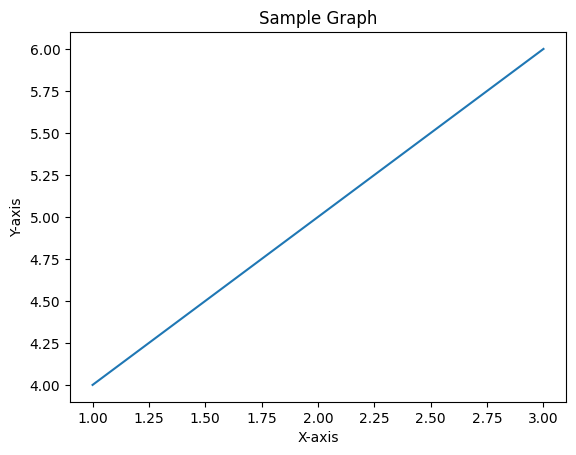

In [ ]:
import matplotlib.pyplot as plt

# Example: Create a simple graph
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Sample Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Save the graph as an image
plt.savefig("graph.png")  # Save as PNG
plt.savefig("graph.jpg")  # Save as JPG
plt.savefig("graph.pdf")  # Save as PDF

# Optional: Display the graph
plt.show()

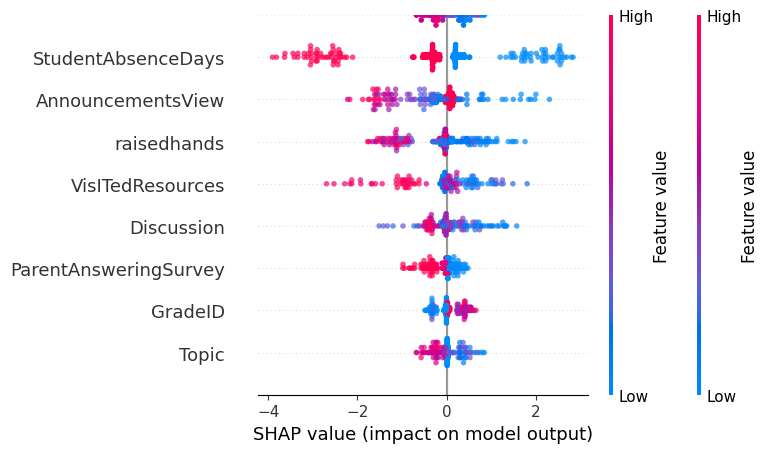

In [ ]:
import matplotlib.pyplot as plt
import shap

# Example SHAP values and features (replace with your actual data)
# shap_values = ...
# features = ...

# Set up the plot aesthetics
plt.figure(figsize=(10, 8))  # Increase figure size
plt.rcParams['font.size'] = 12  # Set font size for better readability

n_classes = shap_values.shape[2]
# Generate the SHAP summary plot
image1= shap.summary_plot(shap_values[:, :, 0], x_test, show=False)
shap.summary_plot(
    shap_values[:, :, 0], x_test,
    max_display=8,  # Limit the number of features displayed
    alpha=0.7,  # Adjust transparency for overlapping points
    show=False  # Prevent automatic display
)



# Save the plot in high resolution
plt.savefig(
    'shap_summary.png',  # File name
    dpi=300,  # High resolution
    bbox_inches='tight',  # Remove extra whitespace
    format='png'  # File format (can also use 'svg' or 'pdf' for vector graphics)
)

# Optionally, display the plot in the notebook or IDE
plt.show()

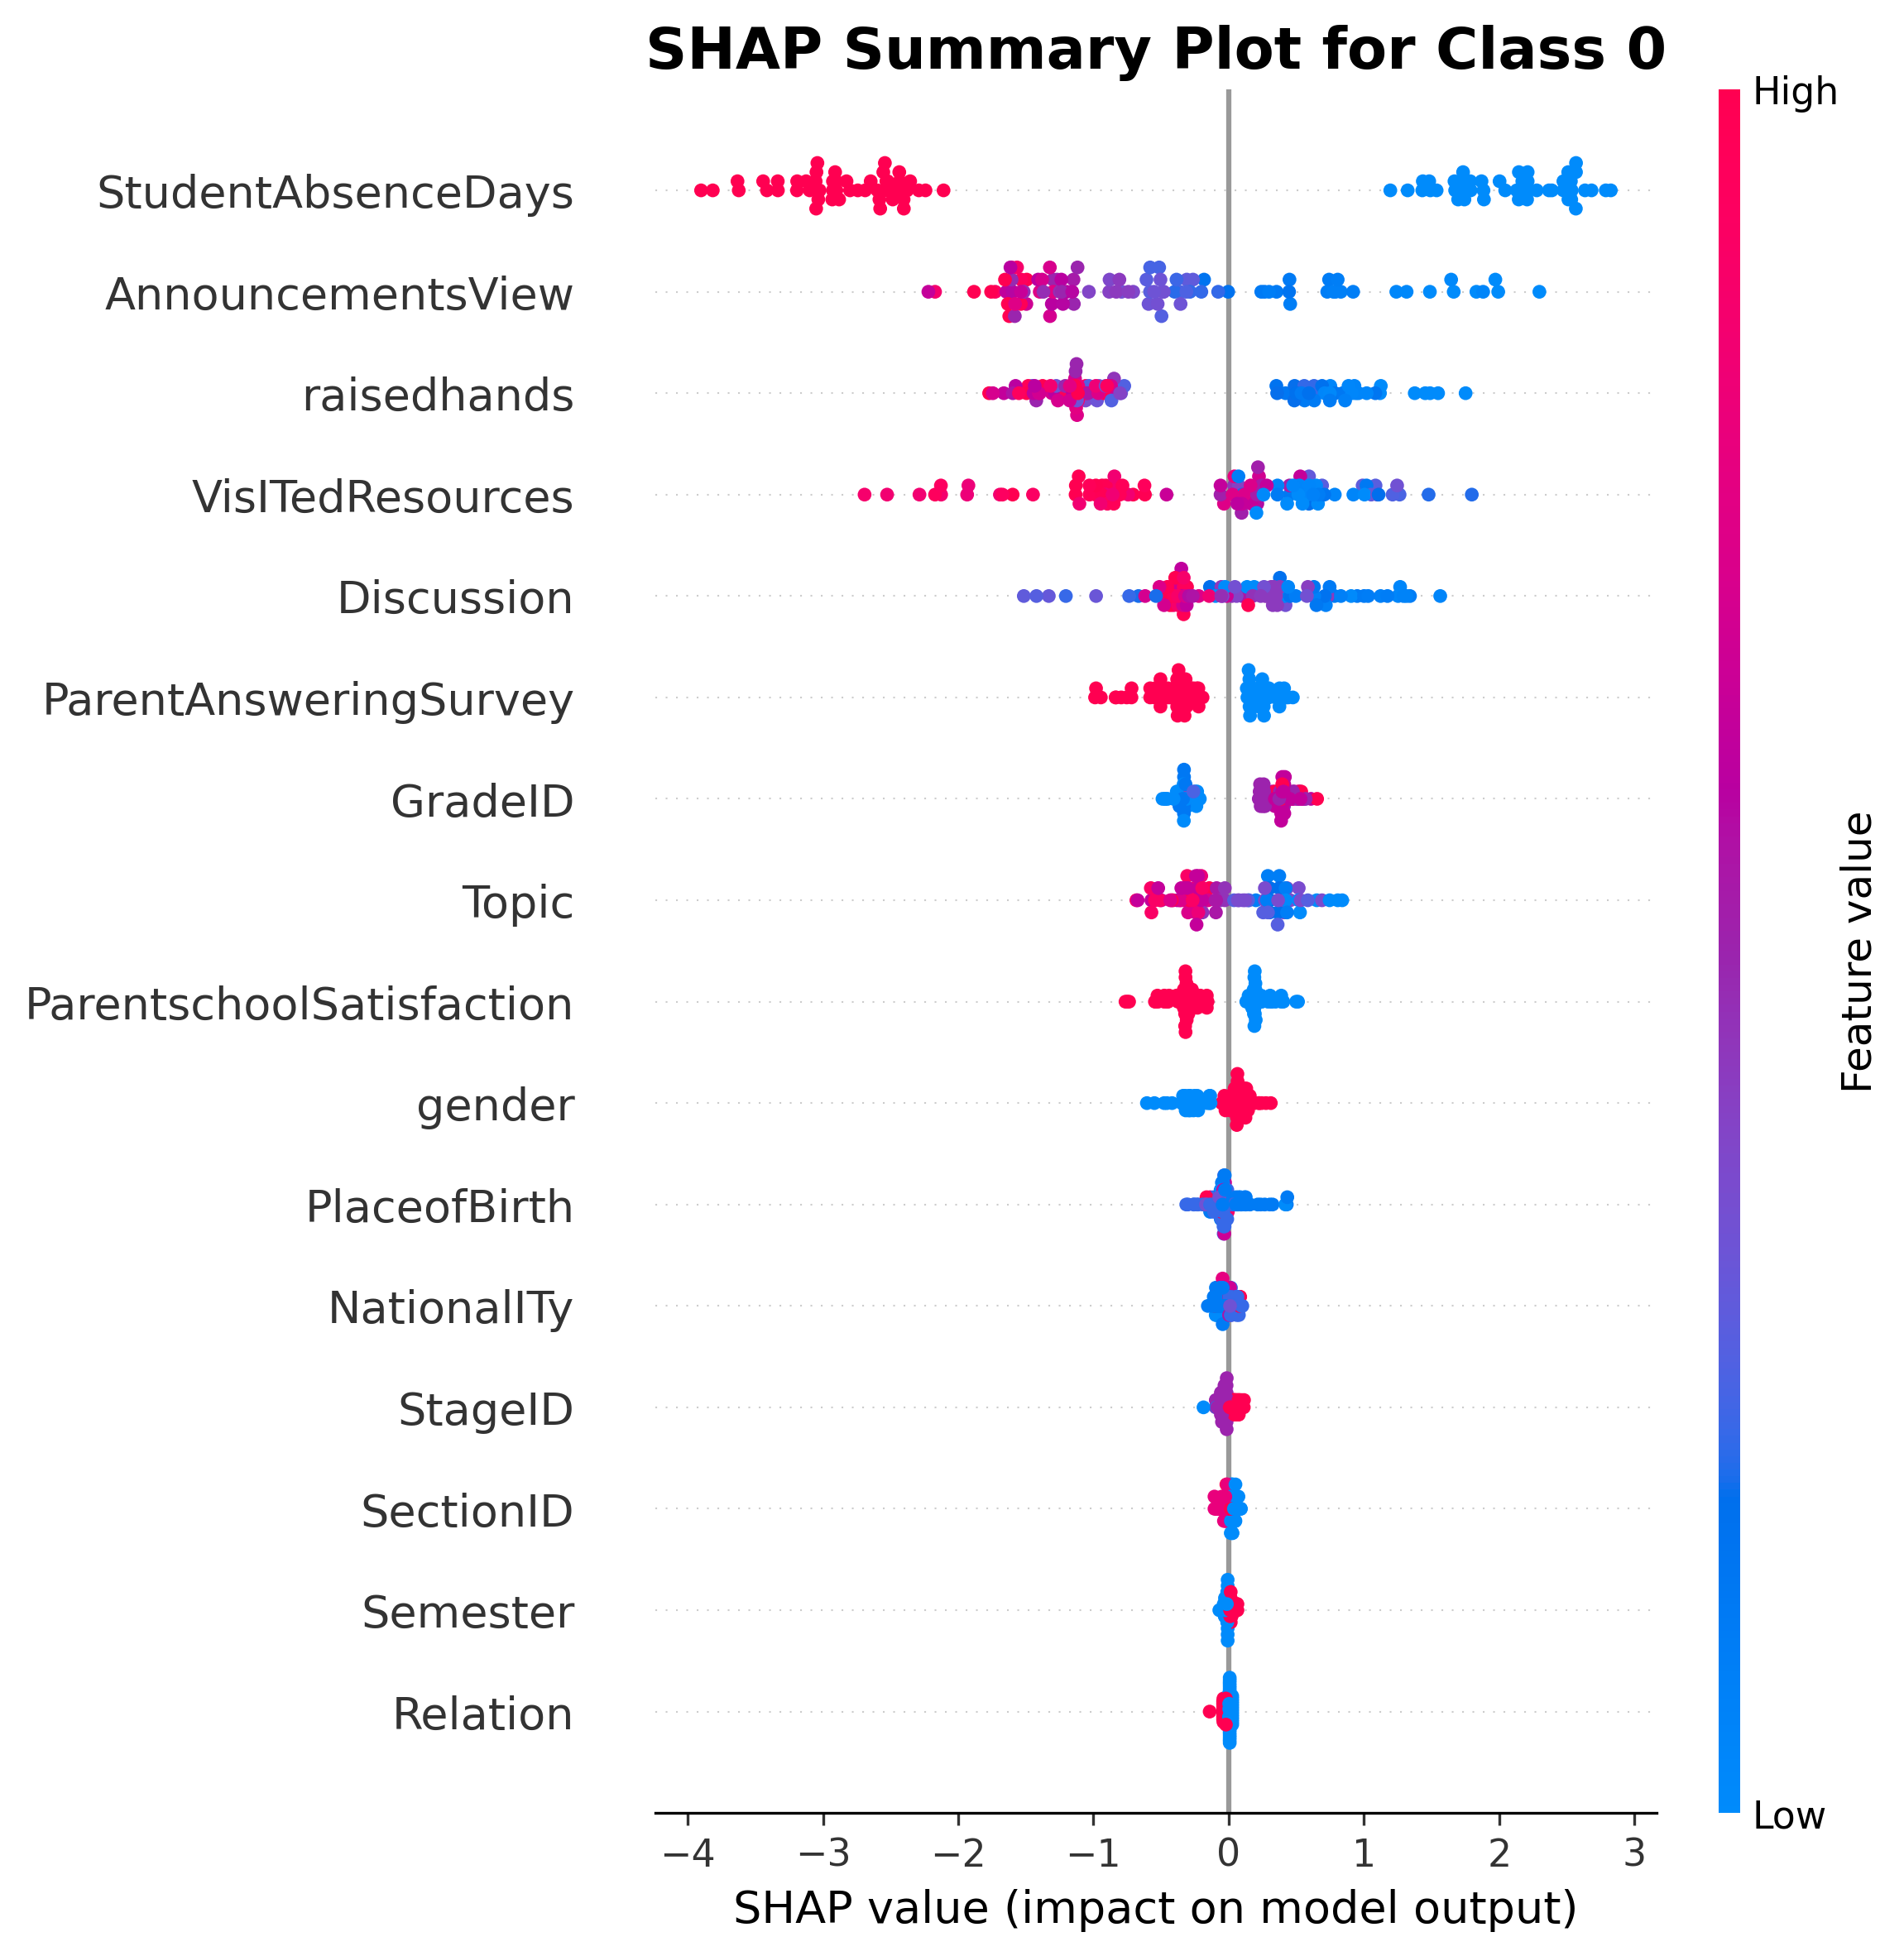

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values and X are already defined
n_classes = shap_values.shape[2]  # Number of classes

# Plot SHAP summary plot for each class
plt.figure(figsize=(10, 8), dpi=300)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
image1= shap.summary_plot(shap_values[:, :, 0], x_test, show=False)
plt.title(f"SHAP Summary Plot for Class {0}", fontweight='bold')
plt.show()
plt.savefig("shap_summary_class_0.png", bbox_inches="tight")

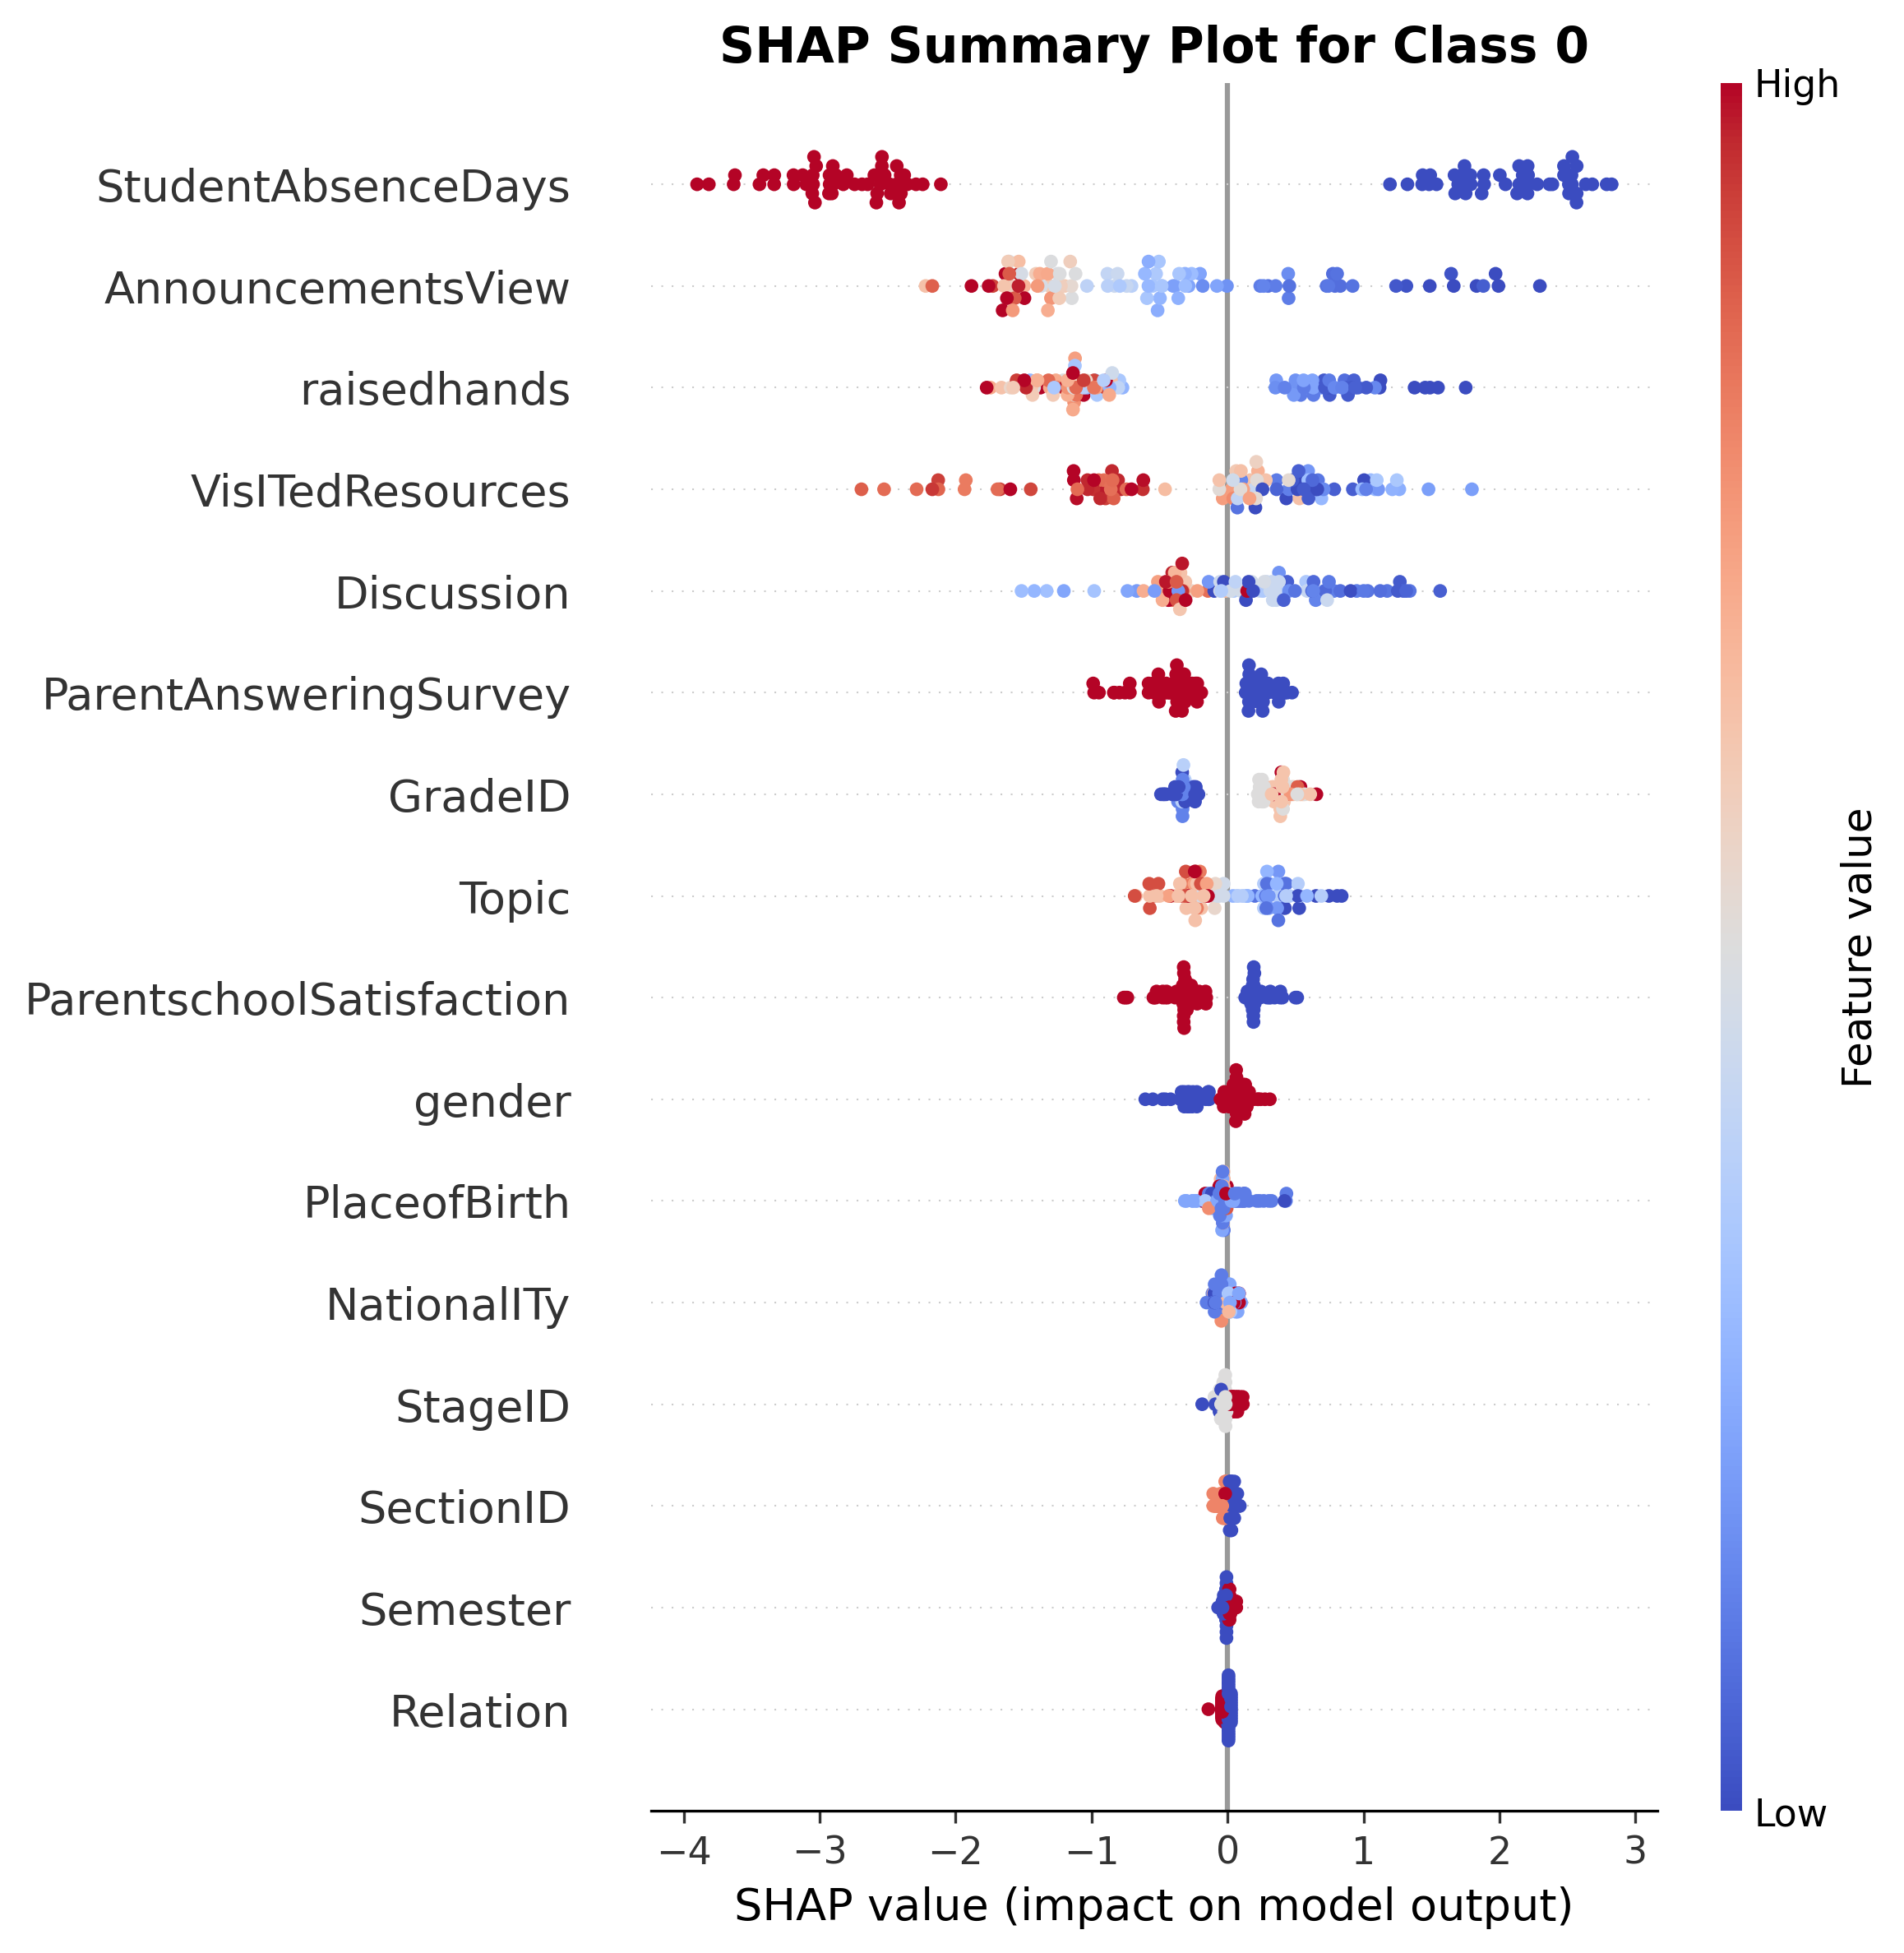

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values and X are already defined
n_classes = shap_values.shape[2]  # Number of classes

# Plot SHAP summary plot for each class
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
image1= shap.summary_plot(shap_values[:, :, 0], x_test, cmap='coolwarm', show=False)
plt.title(f"SHAP Summary Plot for Class {0}", fontweight='bold')
plt.show()
plt.savefig("shap_summary_class_01.png", bbox_inches="tight")

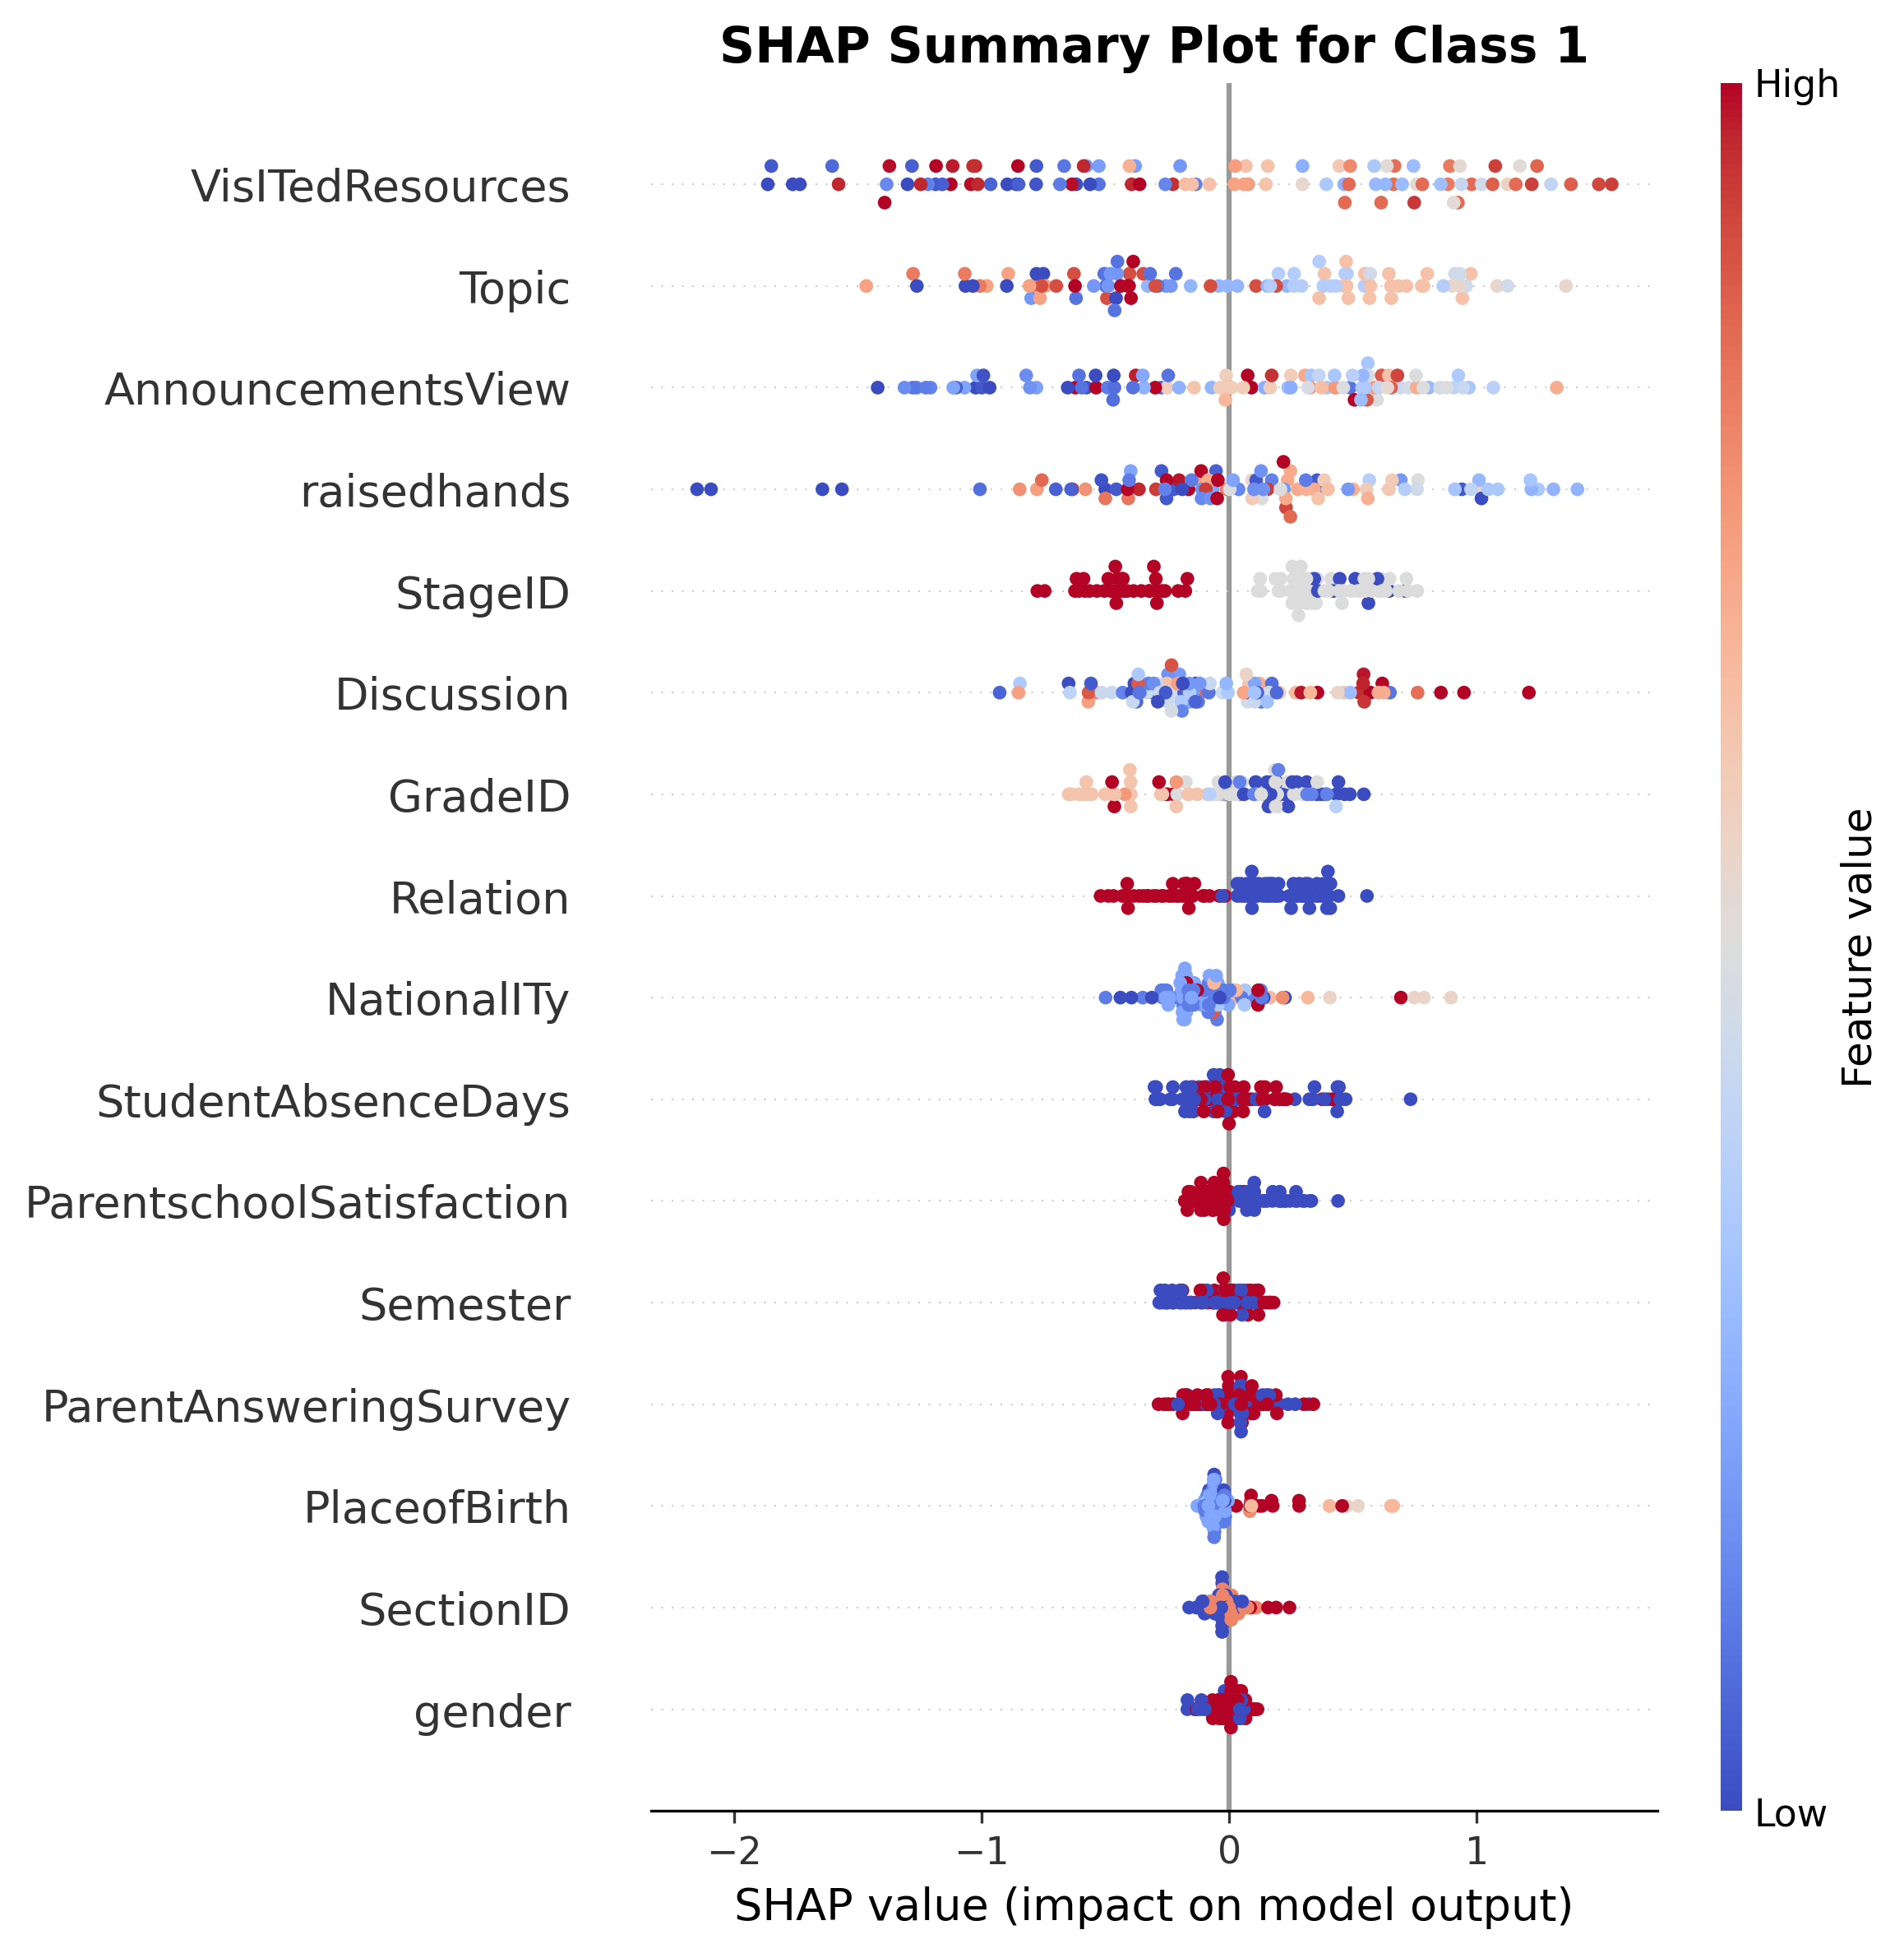

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values and X are already defined
n_classes = shap_values.shape[2]  # Number of classes

# Plot SHAP summary plot for each class
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
image2= shap.summary_plot(shap_values[:, :, 1], x_test,  cmap='coolwarm', show=False)
plt.title(f"SHAP Summary Plot for Class {1}", fontweight='bold')
plt.show()
plt.savefig("shap_summary_class_11.png", bbox_inches="tight")

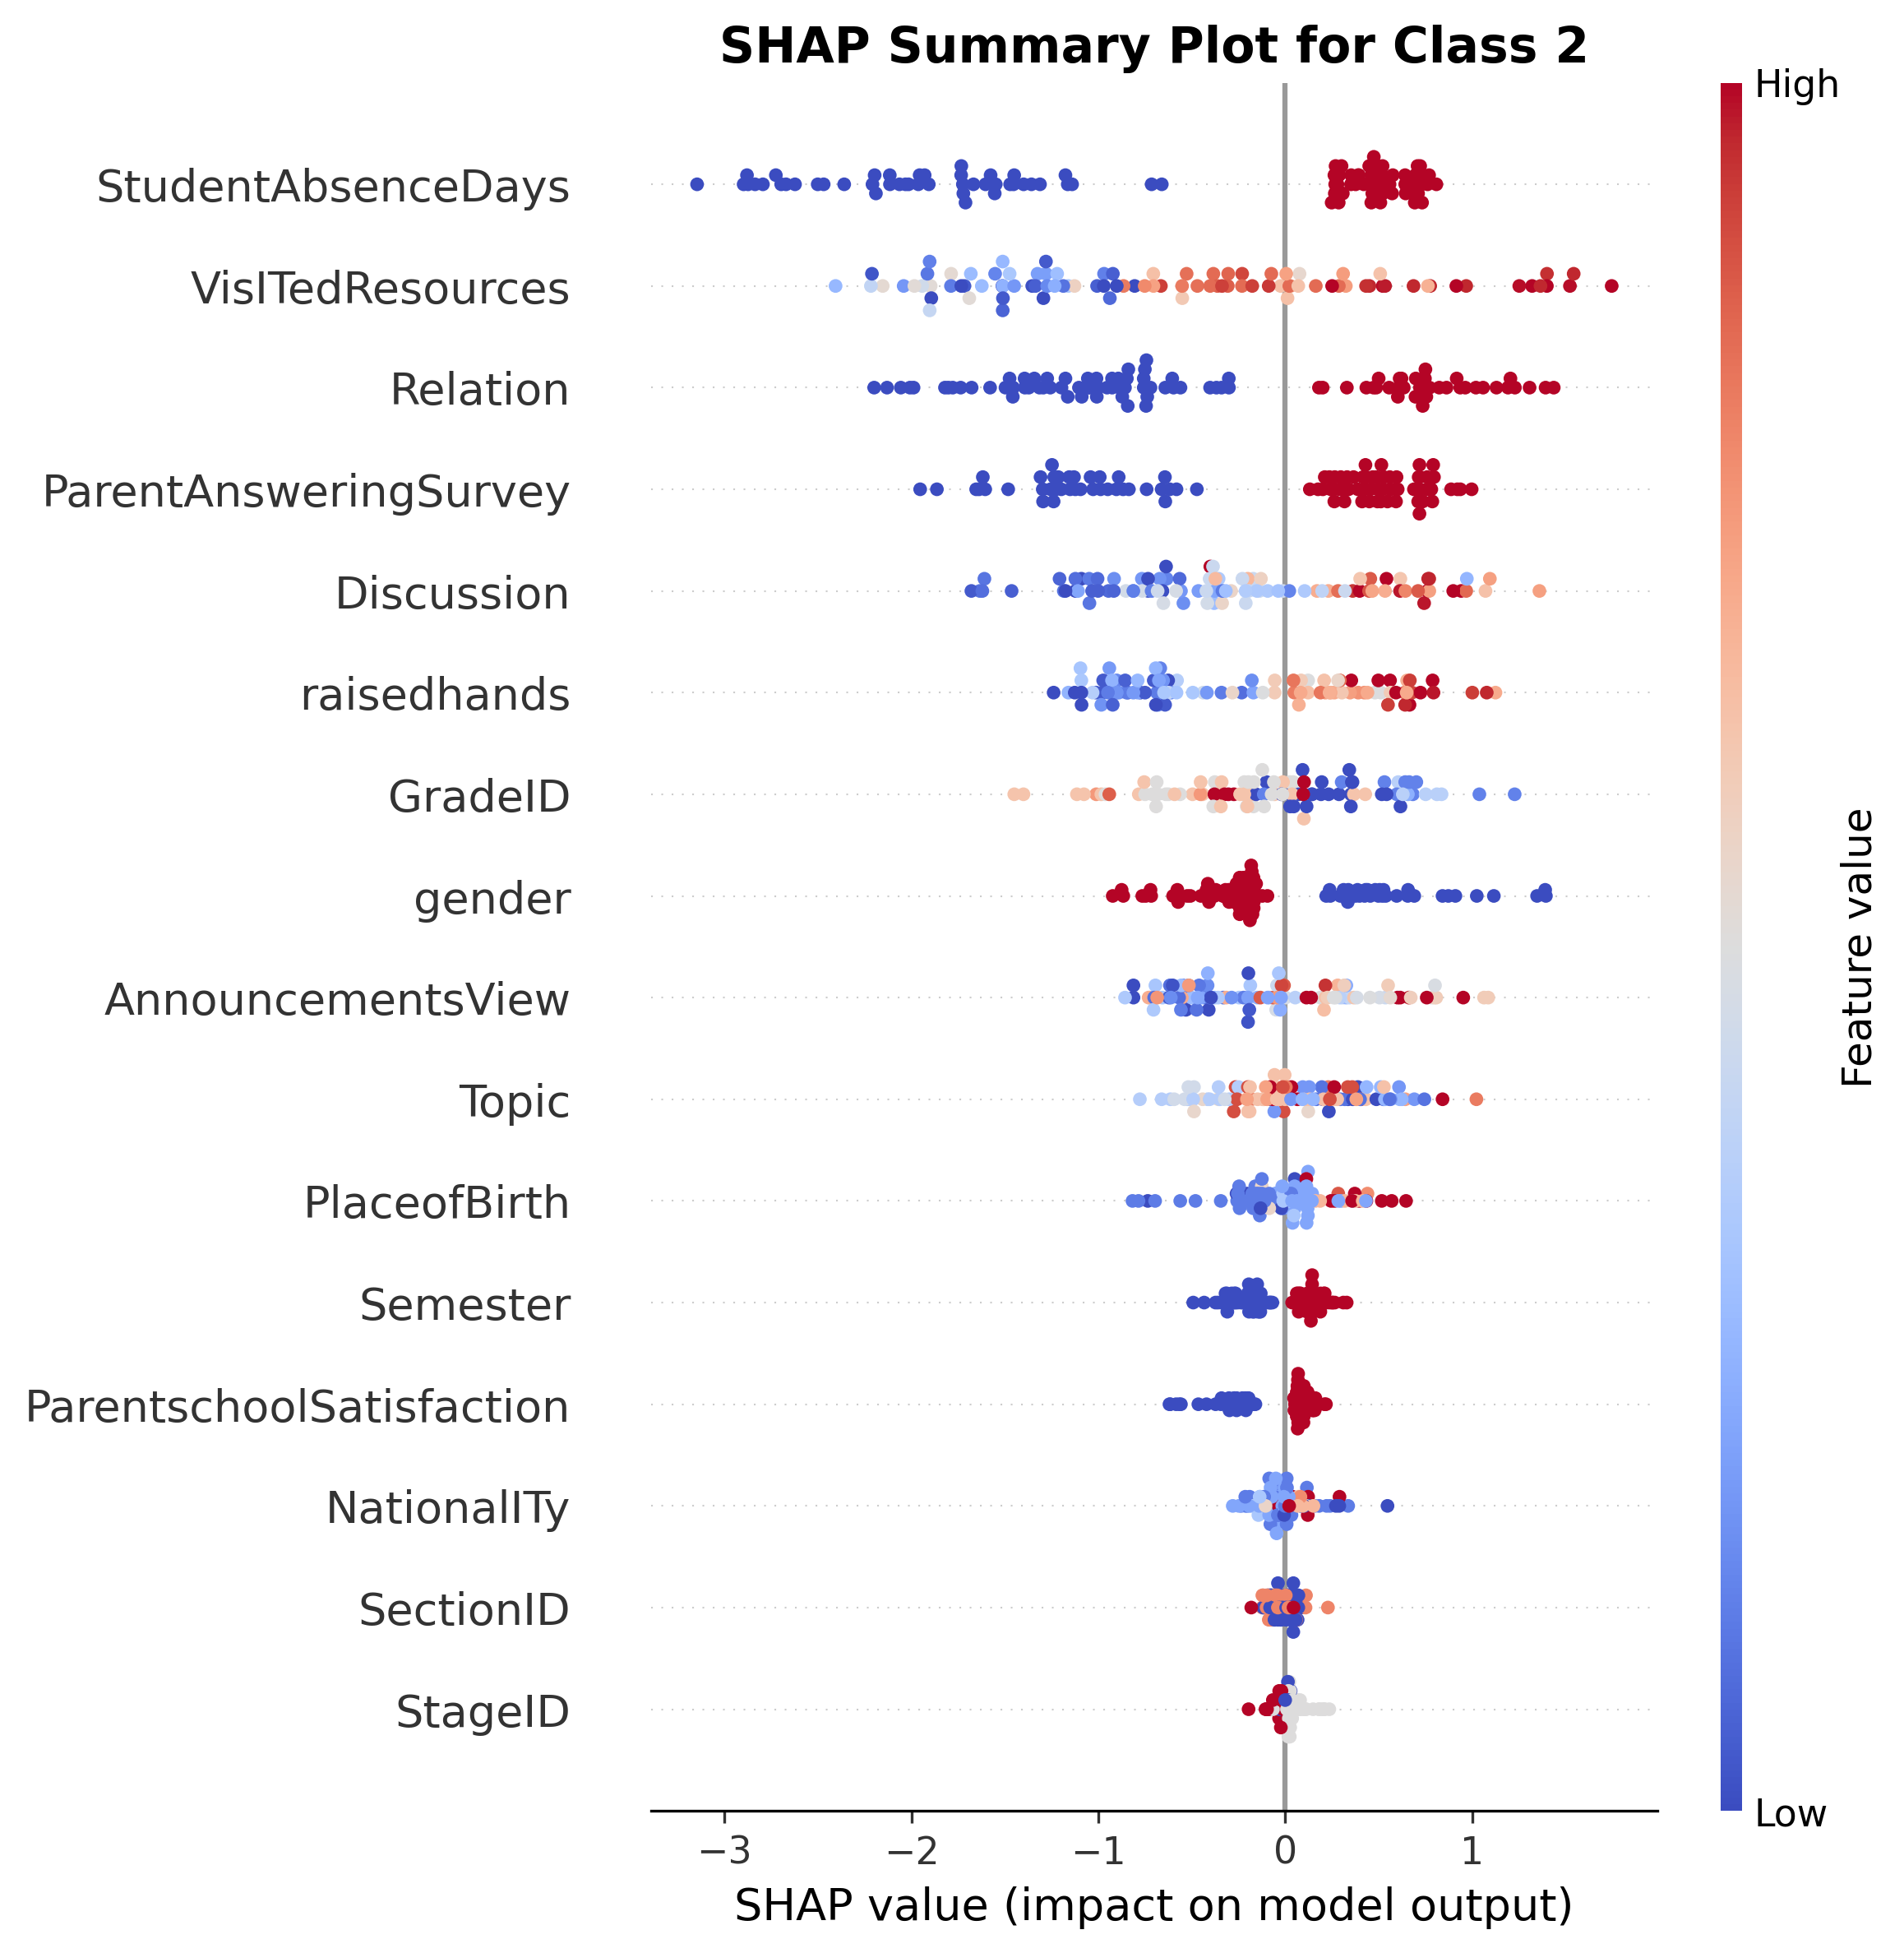

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values and X are already defined
n_classes = shap_values.shape[2]  # Number of classes

# Plot SHAP summary plot for each class
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
image3= shap.summary_plot(shap_values[:, :, 2], x_test, cmap='coolwarm', show=False)
plt.title(f"SHAP Summary Plot for Class {2}", fontweight='bold')
plt.show()
plt.savefig("shap_summary_class_12.png", bbox_inches="tight")